# Clustering and PCA

### Mushroom Dataset

Podeis obtener el conjunto de datos en el siguiente enlace:

[Mushroom Dataset](https://www.kaggle.com/uciml/mushroom-classification)

Como podréis comprobar, hay muchas variables, todas ellas categóricas, por lo que exploraciones con scatterplot no nos serán útiles como en otros casos.

La variable a predecir ``poisonous`` es binaria.


In [2]:
# Carga de librerías, las que hemos considerado básicas, añadid lo que queráis :)

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

### Leer conjunto de datos y primer vistazo

In [3]:
# Leer el csv y sacar por pantalla las cinco primeras filas.
# Leer el csv y sacar por pantalla las cinco primeras filas.
def leer_csv_y_mostrar_5_filas(path):
    df = pd.read_csv(path)
    print("---") # Separador para una mejor visualización
    print("Primeras 5 filas del DataFrame (formato tabla):")
    # Mostrar resultado como una tabla Markdown
    # Añadimos .to_string() para asegurarnos de que se imprima completo si la terminal lo trunca
    # o .to_markdown() para un formato Markdown si lo vas a copiar
    # Puedes elegir entre estas dos opciones, to_markdown es más "bonito" si el entorno lo soporta
    print(df.head().to_markdown(index=False)) # index=False para no mostrar el índice
    print("---") # Separador final
    return df

musrh_path = 'data/raw/mushrooms.csv'
df = leer_csv_y_mostrar_5_filas(musrh_path)

---
Primeras 5 filas del DataFrame (formato tabla):
| class   | cap-shape   | cap-surface   | cap-color   | bruises   | odor   | gill-attachment   | gill-spacing   | gill-size   | gill-color   | stalk-shape   | stalk-root   | stalk-surface-above-ring   | stalk-surface-below-ring   | stalk-color-above-ring   | stalk-color-below-ring   | veil-type   | veil-color   | ring-number   | ring-type   | spore-print-color   | population   | habitat   |
|:--------|:------------|:--------------|:------------|:----------|:-------|:------------------|:---------------|:------------|:-------------|:--------------|:-------------|:---------------------------|:---------------------------|:-------------------------|:-------------------------|:------------|:-------------|:--------------|:------------|:--------------------|:-------------|:----------|
| p       | x           | s             | n           | t         | p      | f                 | c              | n           | k            | e             | e

#### **********************************************************
Conclusiones sobre las 5 primeras filas del dataset de hongos:

- **Variedad de clases:** Hay tanto hongos comestibles (`e`) como venenosos (`p`) en las primeras filas, lo que indica que el dataset está mezclado y no ordenado por clase.
- **Variables categóricas:** Todas las columnas son categóricas, representadas por letras. Esto confirma que será necesario codificar las variables antes de aplicar modelos de machine learning.
- **Diversidad de valores:** Ya en las primeras filas se observa diversidad en variables como `cap-shape`, `cap-color`, `odor`, `gill-size`, `stalk-shape`, etc., lo que sugiere que el dataset tiene suficiente variabilidad para el análisis.
- **No hay valores nulos visibles:** No se observan valores vacíos o extraños en las primeras filas, aunque esto debe comprobarse en todo el dataset.
- **Estructura clara:** El dataset tiene una estructura tabular clara, con una columna objetivo (`class`) y múltiples características morfológicas y ecológicas de los hongos.

**Conclusión:**  
Las primeras filas muestran que el dataset es adecuado para tareas de clasificación, con clases balanceadas y variables categóricas variadas que pueden aportar información relevante para distinguir entre hongos comestibles y venenosos.

#### **********************************************************
#### **********************************************************

### Exploración de datos

In [4]:
# Descripción del conjunto de datos, estándard.

def descripcion_estadistica(df):
    print("---") # Separador para una mejor visualización
    print("Descripción estadística del DataFrame:")
    # Mostrar descripción estadística
    print(df.describe().to_markdown()) # index=False para no mostrar el índice
    print("---") # Separador final

descripcion_estadistica(df)

---
Descripción estadística del DataFrame:
|        | class   | cap-shape   | cap-surface   | cap-color   | bruises   | odor   | gill-attachment   | gill-spacing   | gill-size   | gill-color   | stalk-shape   | stalk-root   | stalk-surface-above-ring   | stalk-surface-below-ring   | stalk-color-above-ring   | stalk-color-below-ring   | veil-type   | veil-color   | ring-number   | ring-type   | spore-print-color   | population   | habitat   |
|:-------|:--------|:------------|:--------------|:------------|:----------|:-------|:------------------|:---------------|:------------|:-------------|:--------------|:-------------|:---------------------------|:---------------------------|:-------------------------|:-------------------------|:------------|:-------------|:--------------|:------------|:--------------------|:-------------|:----------|
| count  | 8124    | 8124        | 8124          | 8124        | 8124      | 8124   | 8124              | 8124           | 8124        | 8124         |

#### **********************************************************
Conclusiones sobre la descripción estadística del DataFrame de hongos:

- **No hay valores nulos:** Todas las columnas tienen 8124 valores (`count`), igual al número total de filas, por lo que no hay valores faltantes.
- **Variables categóricas:** Todas las variables son categóricas, como indica el número de valores únicos (`unique`) en cada columna.
- **Clases balanceadas:** La variable objetivo (`class`) tiene dos valores (`e` y `p`), siendo `e` (comestible) el más frecuente, pero no hay un desbalance extremo.
- **Columnas poco informativas:** La columna `veil-type` solo tiene un valor único (`p`), por lo que no aporta información y se puede eliminar.
- **Diversidad en las variables:** Algunas variables tienen muchas categorías (`gill-color` con 12, `cap-color` con 10, etc.), lo que aporta riqueza al análisis.
- **Valores dominantes:** En varias columnas hay una categoría que aparece con mucha frecuencia (por ejemplo, `bruises=f` o `gill-attachment=f`), lo que puede indicar variables poco informativas o clases mayoritarias.
- **Preparación necesaria:** Todas las variables deben ser codificadas antes de usarlas en modelos de machine learning.

**Resumen:**  
El dataset está limpio, es completamente categórico y tiene suficiente variabilidad para el análisis. Se recomienda eliminar columnas sin variabilidad (`veil-type`) y considerar el tratamiento de variables con categorías muy dominantes.
#### **********************************************************
#### **********************************************************

In [5]:
# Información sobre el tipo de datos de cada feature.
def informacion_tipo_datos(df):
    print("---") # Separador para una mejor visualización
    print("Información sobre el tipo de datos de cada feature:")
    # Mostrar información del DataFrame
    print(df.info())
    print("---") # Separador final
informacion_tipo_datos(df)

---
Información sobre el tipo de datos de cada feature:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ri

#### **********************************************************
Aquí tienes las conclusiones sobre el tipo de datos del DataFrame:

- **Todas las columnas son categóricas:** Las 23 columnas tienen tipo `object`, lo que indica que todas las variables son categóricas y no hay variables numéricas.
- **No hay valores nulos:** Todas las columnas tienen 8124 valores no nulos, igual al número total de filas, por lo que no hay valores faltantes.
- **Preparación necesaria:** Antes de aplicar modelos de machine learning, será necesario transformar estas variables categóricas a variables numéricas mediante técnicas como One Hot Encoding.
- **Consistencia en el dataset:** El hecho de que todas las columnas sean del mismo tipo y no haya nulos facilita el preprocesamiento y asegura que el dataset está bien estructurado para análisis posteriores.

**Resumen:**  
El dataset es completamente categórico, sin valores nulos, y requiere codificación para su uso en modelos predictivos.
#### **********************************************************
#### **********************************************************

#### Calcular el número de nulos de cada feature

In [6]:
# Igual que otras veces, una linea, contar los nulos por variable.
def contar_nulos_por_variable(df):
    print("---") # Separador para una mejor visualización
    print("Conteo de valores nulos por variable:")
    # Contar valores nulos por columna
    nulos = df.isnull().sum()
    print(nulos[nulos > 0].to_markdown())  # Mostrar solo columnas con nulos
    print("---") # Separador final
contar_nulos_por_variable(df)

---
Conteo de valores nulos por variable:
| 0   |
|-----|
---


#### **********************************************************

### **Búsqueda exhaustiva de valores nulos**

In [7]:
# print("--- Paso 1: isnull() ---")
def buscar_valores_nulos(df):
    print("---") # Separador para una mejor visualización
    print("Valores nulos en el DataFrame:")
    # Mostrar valores nulos
    print(df.isnull().sum().to_markdown()) # index=False para no mostrar el índice
    print("---") # Separador final
buscar_valores_nulos(df)

---
Valores nulos en el DataFrame:


|                          |   0 |
|:-------------------------|----:|
| class                    |   0 |
| cap-shape                |   0 |
| cap-surface              |   0 |
| cap-color                |   0 |
| bruises                  |   0 |
| odor                     |   0 |
| gill-attachment          |   0 |
| gill-spacing             |   0 |
| gill-size                |   0 |
| gill-color               |   0 |
| stalk-shape              |   0 |
| stalk-root               |   0 |
| stalk-surface-above-ring |   0 |
| stalk-surface-below-ring |   0 |
| stalk-color-above-ring   |   0 |
| stalk-color-below-ring   |   0 |
| veil-type                |   0 |
| veil-color               |   0 |
| ring-number              |   0 |
| ring-type                |   0 |
| spore-print-color        |   0 |
| population               |   0 |
| habitat                  |   0 |
---


In [8]:
print("\n--- Paso 2: Cadenas vacías o solo espacios ---")
for col in df.columns:
    if df[col].dtype == 'object': # Solo tiene sentido en columnas de tipo objeto (texto)
        empty_strings = (df[col] == '').sum()
        whitespace_strings = df[col].astype(str).str.isspace().sum() # Convertir a str para evitar errores con np.nan
        if empty_strings > 0 or whitespace_strings > 0:
            print(f"Columna '{col}': {empty_strings} cadenas vacías, {whitespace_strings} cadenas con solo espacios")


--- Paso 2: Cadenas vacías o solo espacios ---


In [9]:
print("\n--- Paso 3: Marcadores de missing no estándar ---")

custom_missing_values = ['N/A', 'NA', '?', '-', 'missing', 'desconocido', 'NaN']

for col in df.columns:
    for missing_val in custom_missing_values:
        count = (df[col].astype(str) == missing_val).sum()
        if count > 0:
            if missing_val == '?':
                print(f"Columna '{col}': aparecen {count} valores '?'")
            elif missing_val == 'N/A':
                print(f"Columna '{col}': aparecen {count} valores 'N/A'")
            elif missing_val == 'NA':
                print(f"Columna '{col}': aparecen {count} valores 'NA'")
            elif missing_val == '-':
                print(f"Columna '{col}': aparecen {count} valores '-'")
            elif missing_val == 'missing':
                print(f"Columna '{col}': aparecen {count} valores 'missing'")
            elif missing_val == 'desconocido':
                print(f"Columna '{col}': aparecen {count} valores 'desconocido'")
            elif missing_val == 'NaN':
                print(f"Columna '{col}': aparecen {count} valores 'NaN'")



--- Paso 3: Marcadores de missing no estándar ---
Columna 'stalk-root': aparecen 2480 valores '?'


In [10]:
print("\n--- Paso 4: Búsqueda exhaustiva y consolidada ---")

# Define los valores que deben ser tratados como NaN durante la lectura o después
# Puedes pasar esta lista directamente a pd.read_csv como el argumento `na_values`
# Pero si ya tienes el DataFrame, puedes usar replace.

# Lista de valores que deben ser interpretados como NaN
# ¡Asegúrate de incluir las cadenas vacías y solo espacios si no lo hiciste en la lectura!
all_missing_markers = ['', ' ', 'N/A', 'NA', '?', '-', 'missing', 'desconocido', 'NaN']

# Crear una copia para no modificar el DataFrame original si no lo deseas
df_cleaned = df.copy()

# Reemplazar todos los marcadores personalizados por np.nan
# Usamos regex=False porque no son patrones, son valores exactos.
# También podemos usar .replace() de forma más directa:
df_cleaned = df_cleaned.replace(all_missing_markers, np.nan)

# Ahora, isnull() detectará todo lo que hemos convertido a np.nan,
# además de los np.nan y None originales.
# Analisis exhaustivo para ver si hay nulos, duplicados, tipos de datos y estadisticas.
def analisis_exhaustivo(df):
    print("---") # Separador para una mejor visualización
    print("Análisis exhaustivo del DataFrame:")
    print("Tipos de datos:")
    print(df.dtypes.to_markdown()) # index=False para no mostrar el índice
    print("\nValores nulos:")
    print(df.isnull().sum().to_markdown()) # index=False para no mostrar el índice
    print("\nDuplicados:")
    print(f"Número de filas duplicadas: {df.duplicated().sum()}")
    print("---") # Separador final
analisis_exhaustivo(df_cleaned)


--- Paso 4: Búsqueda exhaustiva y consolidada ---
---
Análisis exhaustivo del DataFrame:
Tipos de datos:
|                          | 0      |
|:-------------------------|:-------|
| class                    | object |
| cap-shape                | object |
| cap-surface              | object |
| cap-color                | object |
| bruises                  | object |
| odor                     | object |
| gill-attachment          | object |
| gill-spacing             | object |
| gill-size                | object |
| gill-color               | object |
| stalk-shape              | object |
| stalk-root               | object |
| stalk-surface-above-ring | object |
| stalk-surface-below-ring | object |
| stalk-color-above-ring   | object |
| stalk-color-below-ring   | object |
| veil-type                | object |
| veil-color               | object |
| ring-number              | object |
| ring-type                | object |
| spore-print-color        | object |
| population        

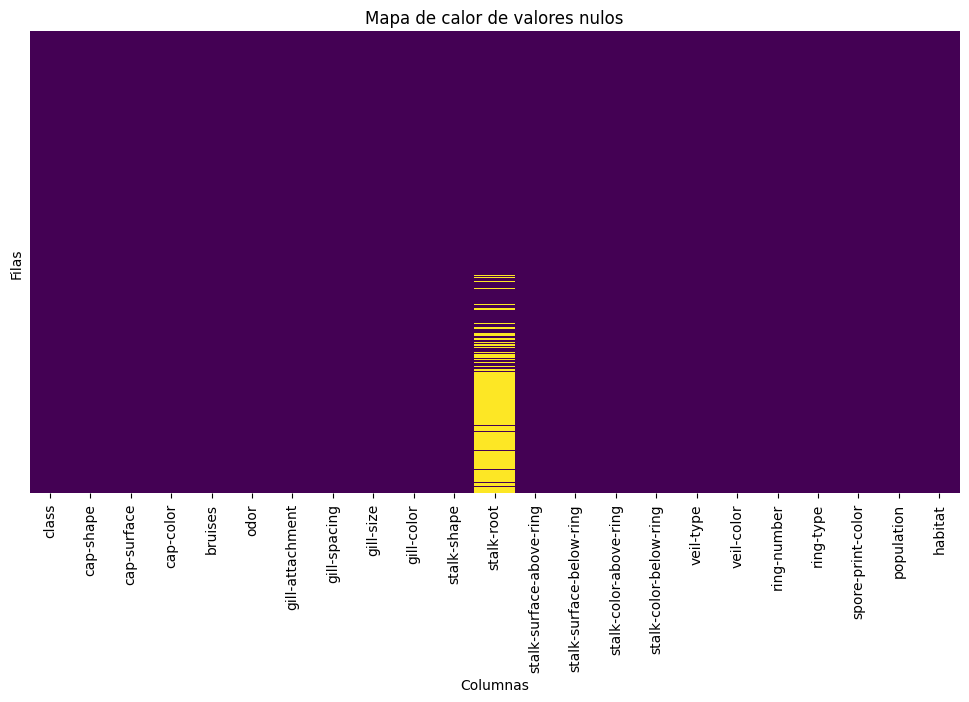

In [11]:
# Visualización de los valores nulos
def visualizar_valores_nulos(df):
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
    plt.title('Mapa de calor de valores nulos')
    plt.xlabel('Columnas')
    plt.ylabel('Filas')
    plt.show()
visualizar_valores_nulos(df_cleaned)

El resultado muestra el número de valores nulos (`NaN`) por columna después de reemplazar los valores `'?'` y otros marcadores personalizados por `np.nan`. La función `isnull().sum()` cuenta cuántos valores nulos hay en cada columna.

**Interpretación:**

- Todas las columnas, excepto `stalk-root`, no tienen valores nulos (`0`).
- La columna `stalk-root` tiene **2480 valores nulos**. Esto indica que aproximadamente la mitad de las filas no tienen información sobre la raíz del tallo, probablemente porque originalmente tenían el valor `'?'` (u otro marcador de missing).
- El resto de las columnas están completas, sin valores faltantes.

**Conclusión:**  
Se debe decidir cómo tratar los nulos en `stalk-root` (eliminarlos, imputar con la moda, etc.). El resto del dataset está limpio respecto a valores nulos.

#### **********************************************************
#### **********************************************************

#### Buscar valores extraños. Para ello, ver los valores únicos en cada feature

In [12]:
# Obtener un nuevo dataframe de dos columnas donde en la primera estén las features (features) y en la otra los valores únicos
# asociados (n_values).
def contar_valores_unicos(df):
    print("---") # Separador para una mejor visualización
    unique_counts = {col: df[col].nunique() for col in df.columns}
    unique_df = pd.DataFrame(list(unique_counts.items()), columns=['Feature', 'Unique Values'])
    print("Número de valores únicos por variable:")
    print(unique_df.to_markdown(index=False)) # index=False para no mostrar el índice
    print("---") # Separador final
    return unique_df
contar_valores_unicos(df_cleaned)

---
Número de valores únicos por variable:
| Feature                  |   Unique Values |
|:-------------------------|----------------:|
| class                    |               2 |
| cap-shape                |               6 |
| cap-surface              |               4 |
| cap-color                |              10 |
| bruises                  |               2 |
| odor                     |               9 |
| gill-attachment          |               2 |
| gill-spacing             |               2 |
| gill-size                |               2 |
| gill-color               |              12 |
| stalk-shape              |               2 |
| stalk-root               |               4 |
| stalk-surface-above-ring |               4 |
| stalk-surface-below-ring |               4 |
| stalk-color-above-ring   |               9 |
| stalk-color-below-ring   |               9 |
| veil-type                |               1 |
| veil-color               |               4 |
| ring-number    

,Feature,Unique Values
0,class,2
1,cap-shape,6
2,cap-surface,4
3,cap-color,10
4,bruises,2
5,odor,9
6,gill-attachment,2
7,gill-spacing,2
8,gill-size,2
9,gill-color,12


#### **************************************************************
Al analizar el número de valores únicos por variable, veo lo siguiente:

- **class** tiene 2 valores, lo esperado porque es la variable objetivo binaria (comestible o venenoso).
- Hay variables con pocos valores únicos (por ejemplo, muchas con 2, 3, 4 o 5), lo que es normal en variables categóricas codificadas.
- Algunas variables tienen más variedad, como `cap-color` (10), `gill-color` (12), `stalk-color-above-ring` y `stalk-color-below-ring` (9 cada una), lo que puede aportar riqueza al modelo.
- La variable **veil-type** solo tiene 1 valor único. Esto significa que no aporta ninguna información para la predicción, así que la eliminaré del dataset.
- El resto de variables parecen razonables y no hay ninguna otra con solo un valor único.

**¿Qué haré?**
- Eliminaré la columna `veil-type` porque no aporta información.
- Mantendré el resto de variables, ya que todas tienen más de un valor único y pueden ser útiles para el análisis y los modelos.
- Seguiré revisando si alguna variable tiene valores dominantes o si hay que agrupar categorías poco frecuentes, pero de momento, solo eliminaré la columna sin variabilidad.
#### **********************************************************
#### **********************************************************

#### Tratar aquellos valores que entendamos que sean nulos


### *****************************************************************
No existe una única "mejor" estrategia universal para tratar los 2480 valores nulos en `stalk-root` (de un total de 8124 filas). La decisión depende del enfoque, del objetivo del análisis y de la importancia de esa variable para tu modelo. Aquí tienes las opciones más habituales y cómo decidir:

### 1. **Eliminar las filas con nulos**
- **Ventaja:** El dataset queda limpio y no introduces supuestos.
- **Desventaja:** Pierdes mucha información (un 30% del dataset).
- **Cuándo hacerlo:** Si tienes muchos datos y la variable no es crítica, o si los nulos parecen aleatorios.

### 2. **Imputar los nulos**
- **Con la moda:** Es lo más habitual en variables categóricas.
- **Con una nueva categoría:** Por ejemplo, poner "desconocido" o "missing".
- **Ventaja:** No pierdes datos.
- **Desventaja:** Puedes introducir sesgo si los nulos no son aleatorios.
- **Cuándo hacerlo:** Si la variable es importante para el modelo o si perder datos no es aceptable.

### 3. **Dejar los nulos**
- Algunos modelos (como los árboles de decisión en scikit-learn) no aceptan nulos, pero otros sí. Si tu pipeline lo permite, puedes dejar los nulos y ver cómo afecta.

### 4. **Analizar el patrón de los nulos**
- ¿Los nulos están distribuidos aleatoriamente o siguen algún patrón? Si los nulos se concentran en un tipo de hongo, puede ser relevante.

---

**¿Cómo saber cuál es la mejor?**
- Haz pruebas: compara el rendimiento del modelo eliminando filas, imputando con la moda y usando una categoría "missing".
- Analiza la importancia de la variable: si `stalk-root` es clave para la predicción, mejor imputar.
- Mira el patrón de los nulos: si no es aleatorio, puede ser mejor crear una categoría especial.

**En resumen:**  
No hay una única mejor estrategia, depende de tu objetivo y del análisis exploratorio. Lo recomendable es probar varias opciones y comparar resultados.



Para analizar la importancia de la variable `stalk-root` y el patrón de los nulos, puedes seguir estos pasos:

---

### 1. **Analizar la importancia de `stalk-root`**

Puedes comprobar si `stalk-root` aporta información relevante para la predicción de la variable objetivo (`class`). Una forma sencilla es entrenar un modelo con y sin esa variable y comparar el rendimiento:

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Dataset sin nulos en stalk-root
df_no_nulls = df_cleaned.dropna(subset=['stalk-root'])
X_full = df_no_nulls.drop('class', axis=1)
y_full = df_no_nulls['class']

# Codifica variables categóricas (One Hot Encoding)
X_full_encoded = pd.get_dummies(X_full)

# Entrena y evalúa un modelo con stalk-root
X_train, X_test, y_train, y_test = train_test_split(X_full_encoded, y_full, test_size=0.33, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
print("Precisión con stalk-root:", clf.score(X_test, y_test))

# Entrena y evalúa un modelo SIN stalk-root
X_full_sin_stalk = X_full.drop('stalk-root', axis=1)
X_full_sin_stalk_encoded = pd.get_dummies(X_full_sin_stalk)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_full_sin_stalk_encoded, y_full, test_size=0.33, random_state=42)
clf2 = RandomForestClassifier(random_state=42)
clf2.fit(X_train2, y_train2)
print("Precisión sin stalk-root:", clf2.score(X_test2, y_test2))

Precisión con stalk-root: 1.0
Precisión sin stalk-root: 1.0


Si la precisión apenas cambia, la variable no es importante. Si baja mucho, sí lo es.

---

### 2. **Analizar el patrón de los nulos**

Puedes comparar la distribución de los nulos respecto a otras variables, especialmente la variable objetivo:

In [14]:
# Crea una columna booleana que indique si stalk-root es nulo
df_cleaned['stalk-root-null'] = df_cleaned['stalk-root'].isnull()

# Cruza con la variable objetivo
print(pd.crosstab(df_cleaned['stalk-root-null'], df_cleaned['class']))

# También puedes cruzar con otras variables categóricas relevantes
# Por ejemplo, con 'cap-shape'
print(pd.crosstab(df_cleaned['stalk-root-null'], df_cleaned['cap-shape']))

class               e     p
stalk-root-null            
False            3488  2156
True              720  1760
cap-shape          b  c     f    k   s     x
stalk-root-null                             
False            300  4  2432   36  32  2840
True             152  0   720  792   0   816


Si los nulos aparecen de forma similar en todas las clases y categorías, el patrón es aleatorio. Si se concentran en alguna clase o valor, el patrón NO es aleatorio.

---

**Conclusión:**  
- Si `stalk-root` es importante y los nulos no son aleatorios, mejor imputar o crear una categoría especial.
- Si no es importante o los nulos son aleatorios, puedes eliminar filas o imputar con la moda.


Los resultados de `pd.crosstab` muestran cómo se distribuyen los valores nulos de `stalk-root` respecto a la variable objetivo (`class`) y a la variable `cap-shape`.

### 1. Relación con la variable objetivo (`class`):

| stalk-root-null |   e   |   p   |
|-----------------|-------|-------|
| False           | 3488  | 2156  |
| True            |  720  | 1760  |

- Cuando **NO hay nulo** (`False`), hay 3488 comestibles (`e`) y 2156 venenosos (`p`).
- Cuando **hay nulo** (`True`), hay 720 comestibles y 1760 venenosos.
- **Interpretación:**  
  Los nulos en `stalk-root` aparecen mucho más en la clase venenosa (`p`). De hecho, la mayoría de los nulos están en la clase venenosa, lo que indica que el patrón de nulos **NO es aleatorio** respecto a la variable objetivo.

---

### 2. Relación con `cap-shape`:

| stalk-root-null |   b |  c |    f |   k |  s |    x |
|-----------------|----|----|------|-----|----|------|
| False           | 300|  4 | 2432 |  36 | 32 | 2840 |
| True            | 152|  0 |  720 | 792 |  0 |  816 |

- Por ejemplo, cuando hay nulo (`True`), la mayoría de los casos están en las formas `k` y `x`.
- Hay formas (`c` y `s`) que no tienen nulos.
- **Interpretación:**  
  Los nulos en `stalk-root` también se concentran en ciertas formas de sombrero, especialmente en `k` y `x`, y no aparecen en otras. Esto refuerza que el patrón de nulos **NO es aleatorio** respecto a `cap-shape`.

---

**Conclusión:**  
El patrón de nulos en `stalk-root` no es aleatorio, sino que está relacionado tanto con la clase (`class`) como con la forma del sombrero (`cap-shape`). Por tanto, si decido imputar los nulos, debería considerar este patrón y no simplemente rellenar con la moda global. Crear una categoría especial para los nulos o imputar de forma estratificada puede ser más adecuado.

---
### **ESTRATEGIAS CON NULOS:**

### 1. **¿Puedo eliminar `stalk-root`?**

- **Técnicamente sí puedes eliminarla**, pero antes deberías valorar si aporta información útil para la predicción.
- El hecho de que los nulos **no sean aleatorios** (están concentrados en la clase venenosa) significa que la ausencia de información en esa columna **es en sí misma información relevante**. Si eliminas la columna, pierdes esa señal.
- Alternativas mejores:  
  - Imputar los nulos con una categoría especial (por ejemplo, "missing") para que el modelo pueda aprender ese patrón.
  - O bien, crear una variable booleana adicional que indique si el valor era nulo.

**Resumen:**  
- `stalk-root`: Mejor no eliminarla directamente. Si la eliminas, pierdes información sobre el patrón de los nulos, que es relevante. Mejor imputar con una categoría especial o analizar su importancia antes de eliminarla.

### **1. Imputar los nulos con una categoría especial ("missing")**

**¿Qué se consigue?**  
- Los valores nulos se transforman en una nueva categoría, por ejemplo `'missing'`.
- El modelo puede aprender que la ausencia de información en `stalk-root` es en sí misma un valor relevante, y puede asociar esa categoría con la clase venenosa si así lo ve en los datos.
- No se pierde información ni se introduce un valor artificial que pueda confundir al modelo.

**Implementación:**

In [15]:
# df_cleaned['stalk-root'] = df_cleaned['stalk-root'].fillna('missing')

Se **puede imputar los valores nulos de `stalk-root` (antes `'?'`) por la moda agrupada según la variable objetivo `class`**. Así, cada grupo (`e` o `p`) tendrá la moda de su clase en los valores faltantes, lo que es más informativo que imputar con la moda global o con `'missing'`.

Esto rellenará los nulos de `stalk-root` con la moda de su grupo de clase (`e` o `p`).  
Si alguna clase no tiene moda (muy raro), dejará el valor como `NaN`.

### **2. Crear una variable booleana adicional que indique si el valor era nulo**

**¿Qué se consigue?**  
- Se añade una nueva columna, por ejemplo `stalk-root-missing`, que vale `True` si el valor original era nulo y `False` si no lo era.
- Así, el modelo puede aprender si la mera ausencia de dato (independientemente del valor imputado en `stalk-root`) es relevante para la predicción.
- Puedes imputar los nulos en `stalk-root` con la moda, pero el modelo también sabrá si el dato era originalmente nulo.

**Implementación:**


In [16]:
# df_cleaned['stalk-root-missing'] = df_cleaned['stalk-root'].isnull()
# df_cleaned['stalk-root'] = df_cleaned['stalk-root'].fillna(df_cleaned['stalk-root'].mode()[0])



---

**Resumen:**  
- Imputar con "missing" permite que el modelo trate la ausencia como una categoría más.
- Añadir una variable booleana permite que el modelo sepa si el dato era nulo, aunque se impute con la moda u otro valor.  
Ambas estrategias ayudan a no perder la información que aporta el patrón de los nulos.


### **Imputamos moda grupal a nulos de stalk-root**

#### Distribución de stalk-root ANTES de imputar

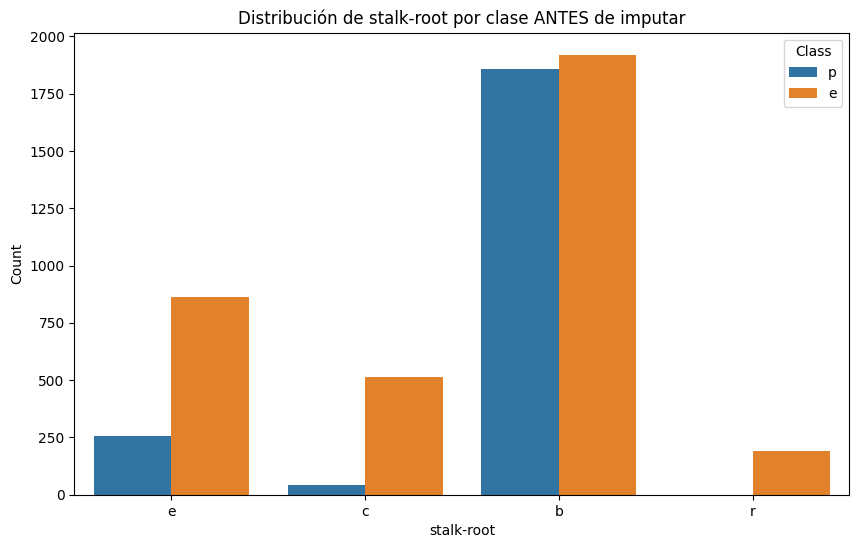

In [17]:
def visualizar_stalk_root(df):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='stalk-root', hue='class')
    plt.title('Distribución de stalk-root por clase ANTES de imputar')
    plt.xlabel('stalk-root')
    plt.ylabel('Count')
    plt.legend(title='Class')
    plt.show()
visualizar_stalk_root(df_cleaned)

#### **********************************************************
#### **********************************************************

In [18]:
# Imputaciones. Podéis quitar esos puntos (fila entera), imputar con la moda o dejar ese valor como una posibilidad más.

# Imputar los nulos de 'stalk-root' por la moda agrupada por 'class'
df_cleaned['stalk-root'] = df_cleaned.groupby('class')['stalk-root'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan)
)
# Comprobar si se han imputado correctamente
print("\n--- Paso 6: Comprobación de imputación de 'stalk-root' ---")
print(df_cleaned['stalk-root'].isnull().sum())  # Debería ser 0 si se ha imputado correctamente
# Visualización de la distribución de 'stalk-root' después de la imputación



--- Paso 6: Comprobación de imputación de 'stalk-root' ---
0


#### *****************************************************************

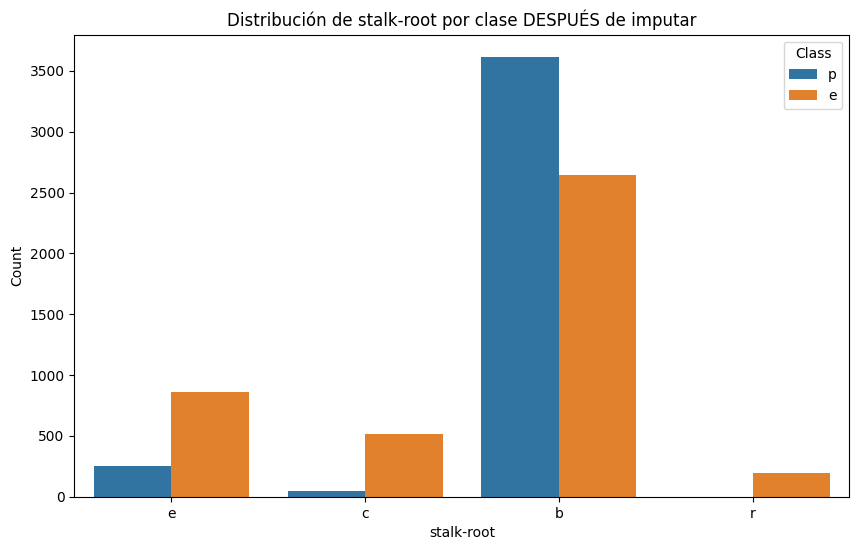

In [19]:
def visualizar_stalk_root(df):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='stalk-root', hue='class')
    plt.title('Distribución de stalk-root por clase DESPUÉS de imputar')
    plt.xlabel('stalk-root')
    plt.ylabel('Count')
    plt.legend(title='Class')
    plt.show()
visualizar_stalk_root(df_cleaned)

#### **********************************************************
#### **********************************************************

#### Mirad cuántos valores hay en cada feature, ¿Todas las features aportan información? Si alguna no aporta información, eliminadla

In [20]:
def contar_valores_por_feature(df):
    print("---") # Separador para una mejor visualización
    print("Conteo de valores por feature:")
    for col in df.columns:
        print(f"{col}: {df[col].nunique()} valores únicos")
    print("---") # Separador final
contar_valores_por_feature(df_cleaned)

---
Conteo de valores por feature:
class: 2 valores únicos
cap-shape: 6 valores únicos
cap-surface: 4 valores únicos
cap-color: 10 valores únicos
bruises: 2 valores únicos
odor: 9 valores únicos
gill-attachment: 2 valores únicos
gill-spacing: 2 valores únicos
gill-size: 2 valores únicos
gill-color: 12 valores únicos
stalk-shape: 2 valores únicos
stalk-root: 4 valores únicos
stalk-surface-above-ring: 4 valores únicos
stalk-surface-below-ring: 4 valores únicos
stalk-color-above-ring: 9 valores únicos
stalk-color-below-ring: 9 valores únicos
veil-type: 1 valores únicos
veil-color: 4 valores únicos
ring-number: 3 valores únicos
ring-type: 5 valores únicos
spore-print-color: 9 valores únicos
population: 6 valores únicos
habitat: 7 valores únicos
stalk-root-null: 2 valores únicos
---


In [21]:
# Eliminamos la columna -veil-type' ya que tiene un único valor
def eliminar_columna_veil_type(df):
    print("---") # Separador para una mejor visualización
    if 'veil-type' in df.columns:
        df = df.drop(columns=['veil-type'])
        print("Columna 'veil-type' eliminada.")
    else:
        print("La columna 'veil-type' no existe en el DataFrame.")
    print("---") # Separador final
    return df
df_cleaned = eliminar_columna_veil_type(df_cleaned)
# Comprobar si se ha eliminado correctamente
def comprobar_eliminacion_columna(df):
    print("---") # Separador para una mejor visualización
    if 'veil-type' not in df.columns:
        print("La columna 'veil-type' ha sido eliminada correctamente.")
    else:
        print("La columna 'veil-type' sigue presente en el DataFrame.")
    print("---") # Separador final
comprobar_eliminacion_columna(df_cleaned)

---
Columna 'veil-type' eliminada.
---
---
La columna 'veil-type' ha sido eliminada correctamente.
---


#### Separar entre variables predictoras y variables a predecir

#### ***************************************************************
Para saber que variables debemos eliminar, además de 'veil-type', debemos construir una matriz de cramer y ver que variables están altamanete correlacionadas para borrar una de ambas.

In [22]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramer_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

def matriz_cramer(df):
    print("---")
    print("Matriz de Cramér's V:")
    cols = df.columns
    corr_matrix = pd.DataFrame(np.ones((len(cols), len(cols))), index=cols, columns=cols)
    for i, col1 in enumerate(cols):
        for j, col2 in enumerate(cols):
            if i < j:
                val = cramer_v(df[col1], df[col2])
                corr_matrix.loc[col1, col2] = val
                corr_matrix.loc[col2, col1] = val
    print(corr_matrix)
    print("---")
    return corr_matrix
# Imprimir la matriz de Cramér's V
matriz_cramer(df_cleaned.drop(columns=['class']))  # Excluimos 'class' para evitar la variable objetivo en la matriz

---
Matriz de Cramér's V:
                          cap-shape  cap-surface  cap-color   bruises  \
cap-shape                  1.000000     0.203721   0.171431  0.255606   
cap-surface                0.203721     1.000000   0.225273  0.134377   
cap-color                  0.171431     0.225273   1.000000  0.217648   
bruises                    0.255606     0.134377   0.217648  1.000000   
odor                       0.245516     0.238446   0.332026  0.660906   
gill-attachment            0.154978     0.210841   0.247965  0.136572   
gill-spacing               0.081702     0.338222   0.399956  0.299134   
gill-size                  0.346823     0.277414   0.470307  0.369326   
gill-color                 0.235100     0.257618   0.282430  0.650326   
stalk-shape                0.307104     0.078770   0.595394  0.099112   
stalk-root                 0.318100     0.194130   0.346068  0.357452   
stalk-surface-above-ring   0.160055     0.144121   0.257079  0.575184   
stalk-surface-below-ring 

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,stalk-root-null
cap-shape,1.000000,0.203721,0.171431,0.255606,0.245516,0.154978,0.081702,0.346823,0.235100,0.307104,...,0.112243,0.214668,0.170397,0.224458,0.199408,0.208181,0.250994,0.241279,0.271124,0.480752
cap-surface,0.203721,1.000000,0.225273,0.134377,0.238446,0.210841,0.338222,0.277414,0.257618,0.078770,...,0.169393,0.252472,0.257451,0.134370,0.099147,0.224726,0.232623,0.262080,0.251007,0.368791
cap-color,0.171431,0.225273,1.000000,0.217648,0.332026,0.247965,0.399956,0.470307,0.282430,0.595394,...,0.320134,0.276539,0.279258,0.150920,0.337731,0.558073,0.286514,0.305809,0.326779,0.507916
bruises,0.255606,0.134377,0.217648,1.000000,0.660906,0.136572,0.299134,0.369326,0.650326,0.099112,...,0.566732,0.483226,0.492838,0.133964,0.071122,0.768492,0.612390,0.300576,0.530920,0.454551
odor,0.245516,0.238446,0.332026,0.660906,1.000000,0.261795,0.429768,0.760919,0.390260,0.575843,...,0.507273,0.450204,0.446679,0.104691,0.742821,0.696915,0.396389,0.374899,0.370058,0.641409
gill-attachment,0.154978,0.210841,0.247965,0.136572,0.261795,1.000000,0.070435,0.108145,0.780160,0.185702,...,0.124696,0.977755,0.977755,0.955097,0.203775,0.250744,0.826898,0.414080,0.436527,0.214581
gill-spacing,0.081702,0.338222,0.399956,0.299134,0.429768,0.070435,1.000000,0.107971,0.325755,0.080558,...,0.414870,0.401152,0.375507,0.098653,0.245659,0.290314,0.308599,0.673949,0.542608,0.081360
gill-size,0.346823,0.277414,0.470307,0.369326,0.760919,0.108145,0.107971,1.000000,0.784064,0.214307,...,0.150917,0.366078,0.347172,0.113972,0.194983,0.570653,0.660680,0.517812,0.499326,0.601857
gill-color,0.235100,0.257618,0.282430,0.650326,0.390260,0.780160,0.325755,0.784064,1.000000,0.612360,...,0.377980,0.420948,0.417087,0.453427,0.444296,0.518523,0.485242,0.424979,0.458522,0.851552
stalk-shape,0.307104,0.078770,0.595394,0.099112,0.575843,0.185702,0.080558,0.214307,0.612360,1.000000,...,0.368149,0.536969,0.549642,0.181876,0.333639,0.615155,0.459459,0.456133,0.417960,0.173076


Para reducir columnas usando la matriz de Cramér's V, normalmente se elimina una de cada par de columnas que tienen una **alta correlación** (por ejemplo, mayor que 0.8).

In [23]:
def columnas_a_eliminar_por_cramer(corr_matrix, threshold=0.8):
    """
    Devuelve una lista de columnas a eliminar para evitar alta multicolinealidad según la matriz de Cramér's V.
    """
    cols = corr_matrix.columns
    eliminar = set()
    for i, col1 in enumerate(cols):
        for j, col2 in enumerate(cols):
            if i < j and corr_matrix.loc[col1, col2] > threshold:
                # Elimina col2 (puedes cambiar por col1 si prefieres)
                eliminar.add(col2)
    return list(eliminar)

# Calcula la matriz de Cramér's V y guárdala en la variable 'matriz'
matriz = matriz_cramer(df_cleaned.drop(columns=['class']))
cols_a_eliminar = columnas_a_eliminar_por_cramer(matriz, threshold=0.8)
print("Columnas a eliminar por alta correlación:", cols_a_eliminar)

# Si quieres eliminar esas columnas de tu DataFrame:
# df_reducido = df_cleaned.drop(columns=cols_a_eliminar)

---
Matriz de Cramér's V:
                          cap-shape  cap-surface  cap-color   bruises  \
cap-shape                  1.000000     0.203721   0.171431  0.255606   
cap-surface                0.203721     1.000000   0.225273  0.134377   
cap-color                  0.171431     0.225273   1.000000  0.217648   
bruises                    0.255606     0.134377   0.217648  1.000000   
odor                       0.245516     0.238446   0.332026  0.660906   
gill-attachment            0.154978     0.210841   0.247965  0.136572   
gill-spacing               0.081702     0.338222   0.399956  0.299134   
gill-size                  0.346823     0.277414   0.470307  0.369326   
gill-color                 0.235100     0.257618   0.282430  0.650326   
stalk-shape                0.307104     0.078770   0.595394  0.099112   
stalk-root                 0.318100     0.194130   0.346068  0.357452   
stalk-surface-above-ring   0.160055     0.144121   0.257079  0.575184   
stalk-surface-below-ring 



**Notas:**
- Cambia el valor de `threshold` según lo estricto que quieras ser (0.8 es habitual).
- El código elimina solo una columna de cada par correlacionado.
- Si tienes NaN en la matriz, puedes añadir `.fillna(0)` antes de comparar.

#### **********************************************************
#### **********************************************************

#### Separar entre variables predictoras y variables a predecir

In [24]:
# La variable que trata de predecir este conjunto de datos es 'class'.
y = df_cleaned['class']
# El resto de variables son las features (X).
X = df_cleaned.drop(columns=['class'])

In [25]:
# Elimina las columnas correlacionadas de X antes del One Hot Encoding
X = X.drop(columns=cols_a_eliminar)

#### Codificar correctamente las variables categóricas a numéricas

In [26]:
# One Hot Encoder (una linea).
# drop_first=True para evitar la trampa de la variable ficticia
X_encoded = pd.get_dummies(X, drop_first=True) 

#### Train test split

In [27]:
# Os lo dejamos a todos igual
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## PCA

Es un conjunto de datos del que aún no hemos visto nada (no tenemos graficas) así que vamos a hacer algunas. Tenemos el problema de que son muchas variables, **PCA al rescate**: le pedimos que nos de dos dimensiones y las pintamos, sabemos que serán **aquellas que retengan más información**.

In [28]:
pca =       # metodo de sklearn
pca.fit(X_train)

# Representar en un scatterplot y poner en color las etiquetas de entrenamiento

SyntaxError: invalid syntax (1949482753.py, line 1)

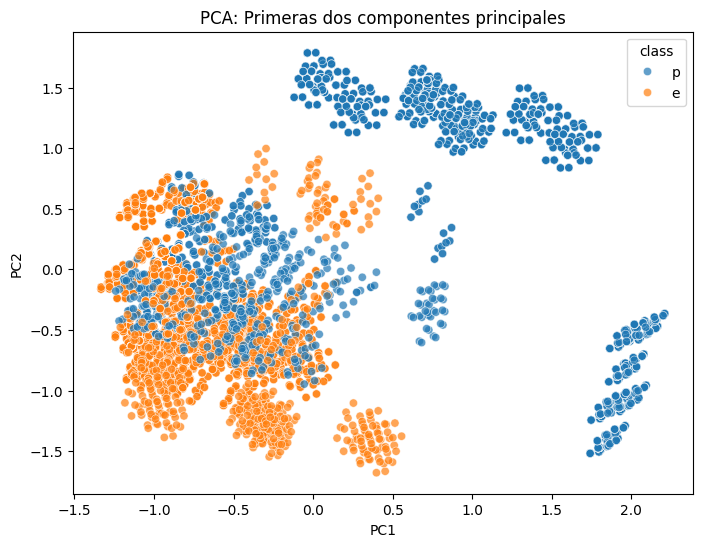

In [ ]:
# 1. Definir el PCA
pca = PCA(n_components=2)

# 2. Ajustar y transformar los datos
X_pca = pca.fit_transform(X_encoded)

# 3. Crear un DataFrame para facilitar el plot
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['class'] = y.values  # Añade la variable objetivo para colorear

# 4. Visualizar con seaborn
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='class', alpha=0.7)
plt.title('PCA: Primeras dos componentes principales')
plt.show()

#### ***************************************************************
El análisis del gráfico generado tras aplicar PCA (Análisis de Componentes Principales) es el siguiente:

- **Separación clara de clases:** Se observa que las dos clases (`e` = comestible, `p` = venenoso) aparecen bastante separadas en el espacio de las dos primeras componentes principales. Esto indica que, aunque todas las variables originales son categóricas, la información relevante para distinguir entre clases se concentra en estas dos dimensiones.
- **Agrupaciones definidas:** Hay agrupaciones o “clusters” bien definidos, especialmente para la clase venenosa (`p`), lo que sugiere que existen patrones morfológicos claros que permiten diferenciar los hongos venenosos de los comestibles.
- **Solapamiento moderado:** Aunque la separación es buena, existe cierta zona de solapamiento entre ambas clases, lo que indica que hay algunos hongos con características intermedias o compartidas.
- **Reducción efectiva de dimensionalidad:** El PCA ha conseguido reducir la complejidad del dataset a solo dos dimensiones manteniendo la mayor parte de la información discriminativa, lo que facilita la visualización y el análisis posterior.
- **Utilidad para modelos:** Esta buena separación visual sugiere que los modelos de clasificación (como Random Forest) podrán distinguir con alta precisión entre hongos comestibles y venenosos usando las variables originales.

**Conclusión:**  
El PCA muestra que el dataset es altamente separable y que las variables categóricas contienen suficiente información para diferenciar las clases. Esto valida tanto la calidad del preprocesamiento como la idoneidad del dataset para tareas de clasificación.
#### **********************************************************
#### **********************************************************

Parece que está bastante separadito, parece que a ojo mucho se puede ver :)

Igualmente, vamos a entrenar un clasificador a ver qué tal lo hace antes de editar más

Precisión del Random Forest: 1.00


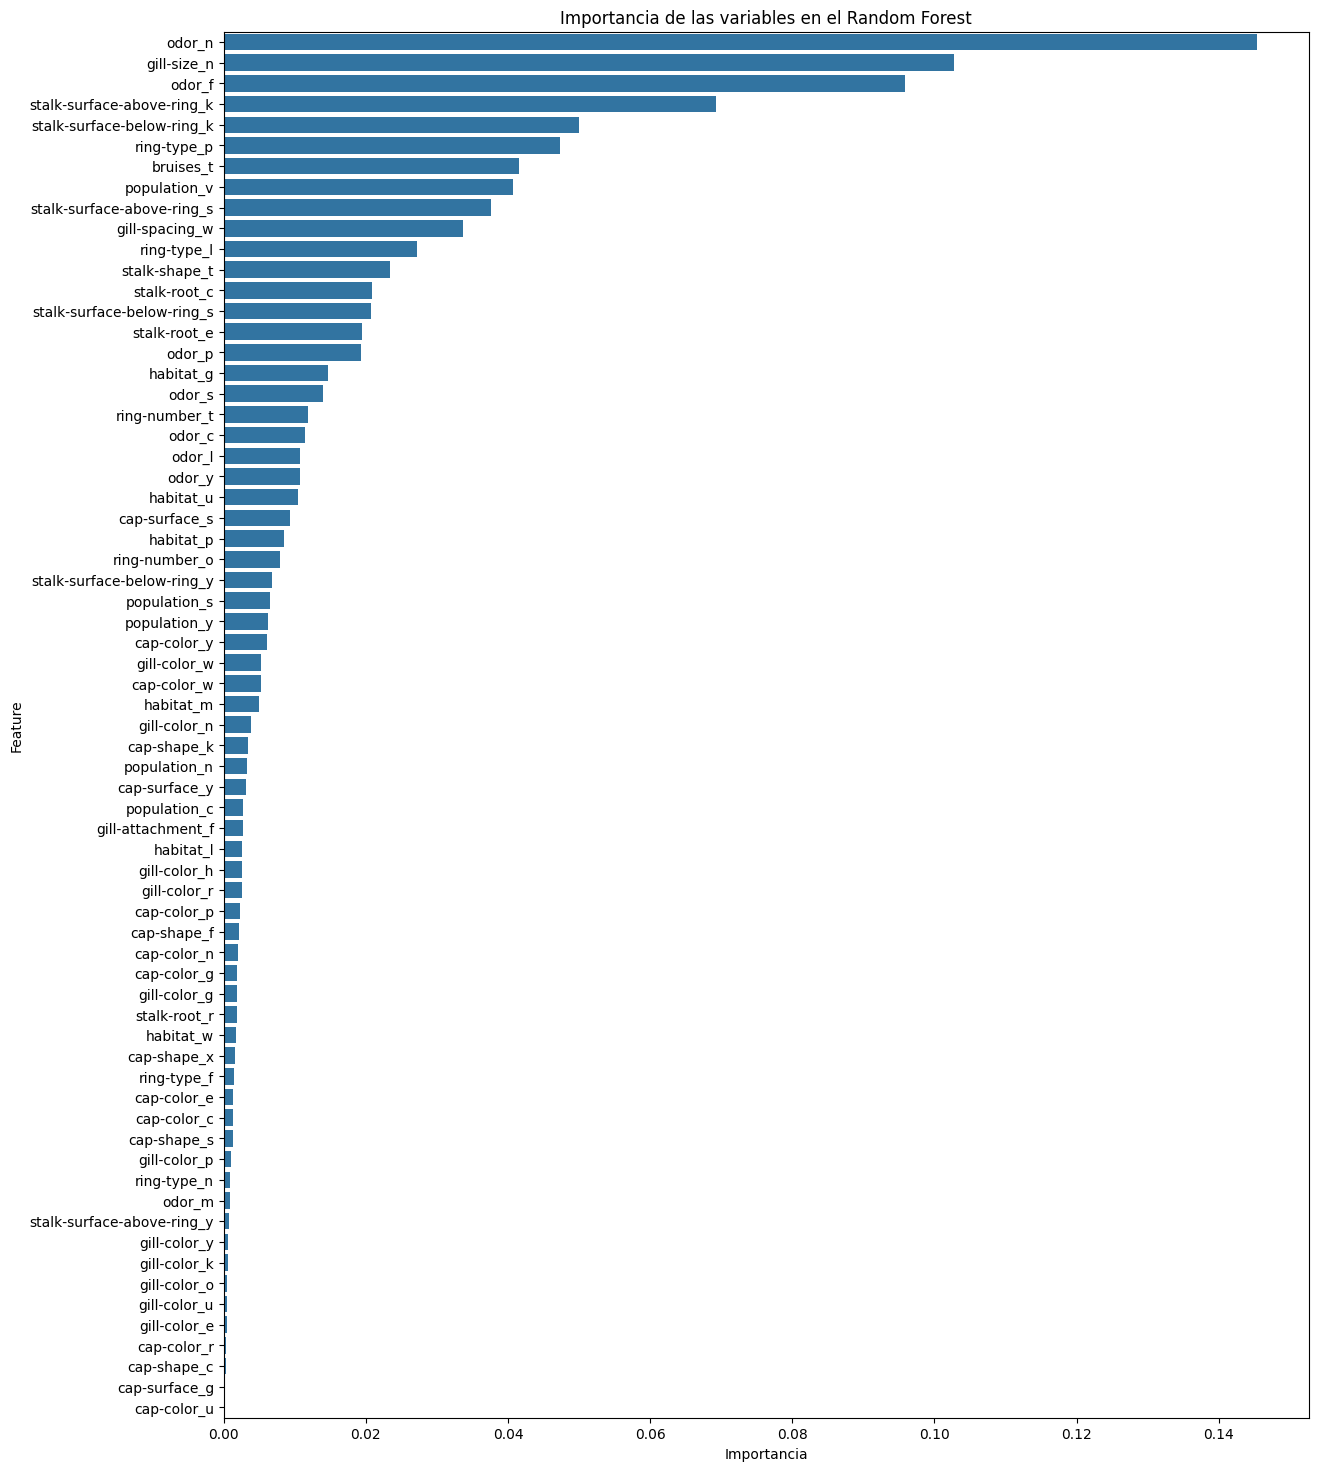

Importancia de las variables:
odor_n                        0.145392
gill-size_n                   0.102724
odor_f                        0.095833
stalk-surface-above-ring_k    0.069266
stalk-surface-below-ring_k    0.049986
ring-type_p                   0.047263
bruises_t                     0.041548
population_v                  0.040725
stalk-surface-above-ring_s    0.037540
gill-spacing_w                0.033702
dtype: float64


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 1. Definir el clasificador y el número de estimadores
clf = RandomForestClassifier(n_estimators=100, random_state=42)
# 2. Entrenar en train (y testear en test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.33, random_state=42)
# 3. Calcular la precisión sobre test
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(f"Precisión del Random Forest: {accuracy:.2f}")
# 4. Mostrar la importancia de las variables
importances = clf.feature_importances_
# 4.1 Crear un DataFrame para visualizar las importancias
importance_df = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': importances}) 
importance_df = importance_df.sort_values(by='Importance', ascending=False)
# 4.2. Visualizar las importancias
plt.figure(figsize=(14, 18))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.yticks(fontsize=10)
plt.title('Importancia de las variables en el Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Feature')
plt.show()

# 4.3 Mostrar la importancia de las variables
importances = clf.feature_importances_
import pandas as pd
feature_importance = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
print("Importancia de las variables:")
print(feature_importance.head(10))

#### *************************************************************
Análisis de los resultados y la gráfica de importancia de las variables del Random Forest:

---

### **Análisis de la importancia de las variables**

- **Variables más relevantes:**  
  Las variables más importantes para la clasificación son `odor_n`, `gill-size_n`, y `odor_f`. En particular, `odor_n` destaca claramente sobre el resto, con una importancia del 14.5%. Esto indica que el olor del hongo es el factor más determinante para predecir si es comestible o venenoso.
- **Características morfológicas clave:**  
  Además del olor, la variable `gill-size_n` (tamaño de las láminas) y otras relacionadas con la superficie del tallo (`stalk-surface-above-ring_k`, `stalk-surface-below-ring_k`, `stalk-surface-above-ring_s`) también tienen un peso considerable. Esto sugiere que ciertas características físicas del hongo son muy útiles para la clasificación.
- **Importancia de la variable `bruises_t`:**  
  La presencia de magulladuras (`bruises_t`) también es relevante, lo que puede estar relacionado con la toxicidad o la comestibilidad.
- **Variables menos relevantes:**  
  Muchas variables tienen una importancia muy baja, lo que indica que aportan poca información adicional al modelo. Esto es habitual en datasets con muchas variables categóricas tras el one-hot encoding.

---

### **Interpretación de la gráfica**

- **Distribución desigual:**  
  La gráfica muestra que unas pocas variables concentran la mayor parte de la importancia, mientras que la mayoría tienen un peso muy bajo.
- **Facilidad de interpretación:**  
  El modelo Random Forest permite identificar fácilmente qué características son más útiles para la predicción, lo que ayuda a entender el fenómeno y a reducir la dimensionalidad si se desea.
- **Posible reducción de variables:**  
  Dado que las primeras 10 variables explican la mayor parte de la importancia, se podría considerar reducir el número de variables para simplificar el modelo sin perder capacidad predictiva.

---

**Conclusión:**  
El olor (`odor_n`, `odor_f`), el tamaño de las láminas (`gill-size_n`) y ciertas características del tallo y el anillo son los factores más determinantes para clasificar los hongos. El modelo es capaz de identificar patrones claros y la mayoría de las variables tienen poca relevancia, por lo que se podría optimizar el modelo usando solo las variables más importantes.
#### **********************************************************
#### **********************************************************

Es un conjunto sencillo y Random Forest es muy bueno en su trabajo, Igualmente, vamos a ver qué tamaño tenemos de dataset:


In [ ]:
X_train.shape

(5443, 67)

¿Muchas features no? Vamos a reducir las usando PCA.

<Axes: >

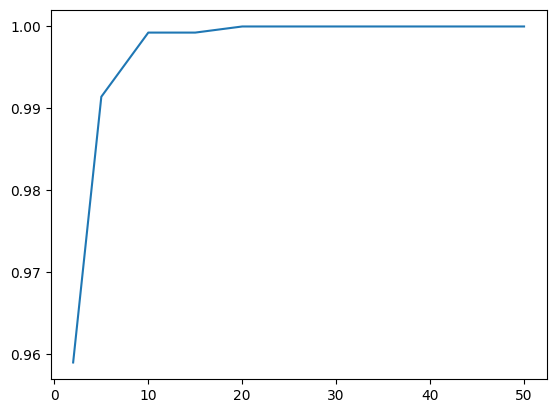

In [ ]:
# definir un rango de valores a probar
n_features = [2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
scores = []
# # Iterar sobre el rango de valores
# for n in n_features:
#     # 1. Definir PCA con el número de componentes
#     pca = PCA(n_components=n)
#     # 2. Aprender PCA sobre X_train
#     X_train_pca = pca.fit_transform(X_train)
#     # 3. Definir el Random Forest
#     clf = RandomForestClassifier(n_estimators=100, random_state=42)
#     # 4. Entrenar clasificador
#     clf.fit(X_train_pca, y_train)
#     # 5. Evaluar en X_test transformado
#     X_test_pca = pca.transform(X_test)
#     score = clf.score(X_test_pca, y_test)
    
#     # Guardar el score  
#     scores.append(score)

for n in n_features:
    # Hacer PCA sobre X_train
    # 1. Definir PCA
    pca = PCA(n_components=n)
    # 2. Aprender PCA sobre X_train
    X_train_pca = pca.fit_transform(X_train)

    # Entrenar Random Forest
    # 1. Definir el RF
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    # 2. Entrenar clasificador
    clf.fit(X_train_pca, y_train)


    # Guardar el score
    X_test_pca = pca.transform(X_test)
    score = clf.score(X_test_pca, y_test)
    scores.append(score)

# Visualizar los scores
sns.lineplot(x=n_features, y=scores)

#### ***************************************************************
### ¿Qué significa el gráfico del codo en PCA?

- El **gráfico del codo** en PCA (como el que muestras) representa cómo varía la precisión del modelo al aumentar el número de componentes principales.
- El "codo" es el punto donde añadir más componentes **ya no mejora significativamente** la precisión.
- En tu gráfico, el codo está en torno a **10 componentes**, lo que indica que con 10 dimensiones ya capturas casi toda la información relevante para la clasificación.

---

### ¿Y en KMeans? ¿Cómo se usa el codo?

- En **KMeans**, el gráfico del codo se usa para elegir el **número óptimo de clusters** (`n_clusters`).
- Se representa la **inercia** (suma de distancias cuadradas de cada punto a su centroide) frente al número de clusters.
- El "codo" es el punto donde añadir más clusters **no reduce mucho la inercia**: ahí está el número óptimo de clusters.

---

### ¿Cómo se lee el gráfico del codo en KMeans?

1. **Eje X:** Número de clusters (`k`).
2. **Eje Y:** Inercia (o suma de distancias cuadradas).
3. **Interpretación:**  
   - Al principio, aumentar `k` reduce mucho la inercia.
   - Llega un punto (el "codo") donde la mejora se estabiliza.
   - Ese punto es el número recomendado de clusters.

---

### ¿Cómo aplicarlo en tu caso?

- **En PCA:** El codo te dice cuántas componentes usar para reducir la dimensionalidad (en tu caso, 10).
- **En KMeans:** Debes hacer un gráfico del codo específico para KMeans, probando diferentes valores de `k` y buscando el punto donde la inercia deja de bajar rápidamente.

**Ejemplo de código para el codo en KMeans:**

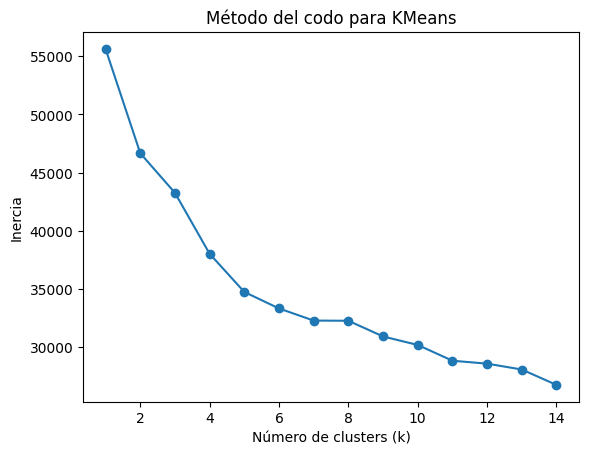

In [29]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
k_values = range(1, 15)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_encoded)  # Usa tus datos numéricos
    inertias.append(kmeans.inertia_)

plt.plot(k_values, inertias, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo para KMeans')
plt.show()

Según el gráfico del método del codo para KMeans:

- **Número óptimo de clusters:**  
  Debes elegir el valor de **k** donde la curva de inercia deja de descender bruscamente y empieza a aplanarse. En tu gráfico, el "codo" está aproximadamente en **k = 4**. Por tanto, lo recomendable es usar **4 clusters** para KMeans.

- **¿Qué es la inercia?**  
  La **inercia** es la suma de las distancias cuadradas de cada punto a su centroide más cercano. Es una medida de cuán compactos son los clusters:  
  - **Menor inercia** significa clusters más compactos y mejor agrupados.
  - Al aumentar k, la inercia siempre disminuye, pero llega un punto donde la mejora es marginal (el "codo").

**Resumen:**  
- Elige **k = 4** clusters.
- La inercia mide la compacidad de los clusters; cuanto menor, mejor (hasta el codo).



- Elige el valor de `k` donde veas el "codo" en la curva.

---

**Resumen:**  
- El codo en PCA te dice cuántas dimensiones usar.
- El codo en KMeans te dice cuántos clusters usar.
- Ambos gráficos se leen igual: busca el punto donde la curva deja de bajar rápidamente. Ese es el valor óptimo.

El gráfico muestra cómo varía la precisión del modelo Random Forest al reducir la dimensionalidad de los datos mediante PCA, usando diferentes números de componentes principales.

### **Análisis:**

- **Incremento rápido de precisión:**  
  La precisión del modelo aumenta rápidamente al pasar de 2 a 10 componentes principales, alcanzando valores cercanos al 99%. Esto indica que la mayor parte de la información relevante para la clasificación está contenida en las primeras componentes.
- **Estabilización del rendimiento:**  
  A partir de unas 10 componentes, la precisión se estabiliza y prácticamente alcanza el 100%. Añadir más componentes no mejora el rendimiento, lo que sugiere que las componentes adicionales aportan poca o ninguna información nueva para la tarea de clasificación.
- **Reducción efectiva de dimensionalidad:**  
  Es posible reducir el número de variables a aproximadamente un 10-20% de las originales sin perder capacidad predictiva. Esto simplifica el modelo y reduce el coste computacional, manteniendo una precisión excelente.
- **Conclusión:**  
  El dataset es altamente separable y la información relevante está concentrada en pocas dimensiones. Usar PCA permite simplificar el modelo sin sacrificar rendimiento, lo que es ideal para tareas de clasificación y análisis exploratorio.
  #### **********************************************************
  #### **********************************************************

Vale, estamos viendo que a partir de unas 10 features ya tenemos el score que queríamos y además hemos reducido las variables a un 10% de las que teníamos, incluso menos que las variables originales.

## Clustering

Viendo que el conjunto de datos es sencillito, podemos intentar hacer algo de clustering a ver qué información podemos obtener.

El primer paso va a ser importar la función de Kmeans de sklearn, y a partir de ahi, vamos a buscar el valor óptimo de clusters. Como hemos visto anteriormente, este valor lo obtenemos, por ejemplo, del codo de la gráfica que representa el total de las distancias de los puntos a los centros de los clusters asociados. Os dejo la página de la documentación de sklearn para que lo busquéis:

[K-Means on sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

Con esto solo hay que ahora generar los modelos de kmeans, evaluar y pintar la gráfica para los valores de ``k`` que establezcais.




<Axes: >

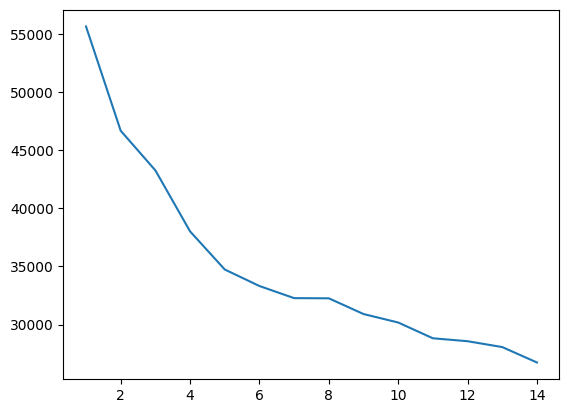

In [35]:
from sklearn.cluster import KMeans

scores = []
# definir un rango
k_values = range(1, 15)
# Iterar sobre el rango de valores
for a in k_values:

    # Definir Kmeans y ajustar
    kmeans = KMeans(n_clusters=a, random_state=42)
    kmeans.fit(X_encoded)  # Usa tus datos numéricos
    # Calcular la silueta
    score = kmeans.inertia_  # Inercia como métrica de calidad del clustering
    scores.append(score)  # Guardar la predicción
   
# Guardar la predicción
sns.lineplot(x=k_values, y=scores)

Con el valor que hayáis obtenido de la gráfica, podéis obtener una buena aproximación de Kmeans y con ello podemos pasar a explorar cómo de bien han separado la información los distintos clusters. Para ello, se va a hacer un ``catplot``, seaborn os lo hará solito. Con esto lo que se pretende ver es la distribución de la varaible a predecir en función del cluster que haya determinado Kmeans.

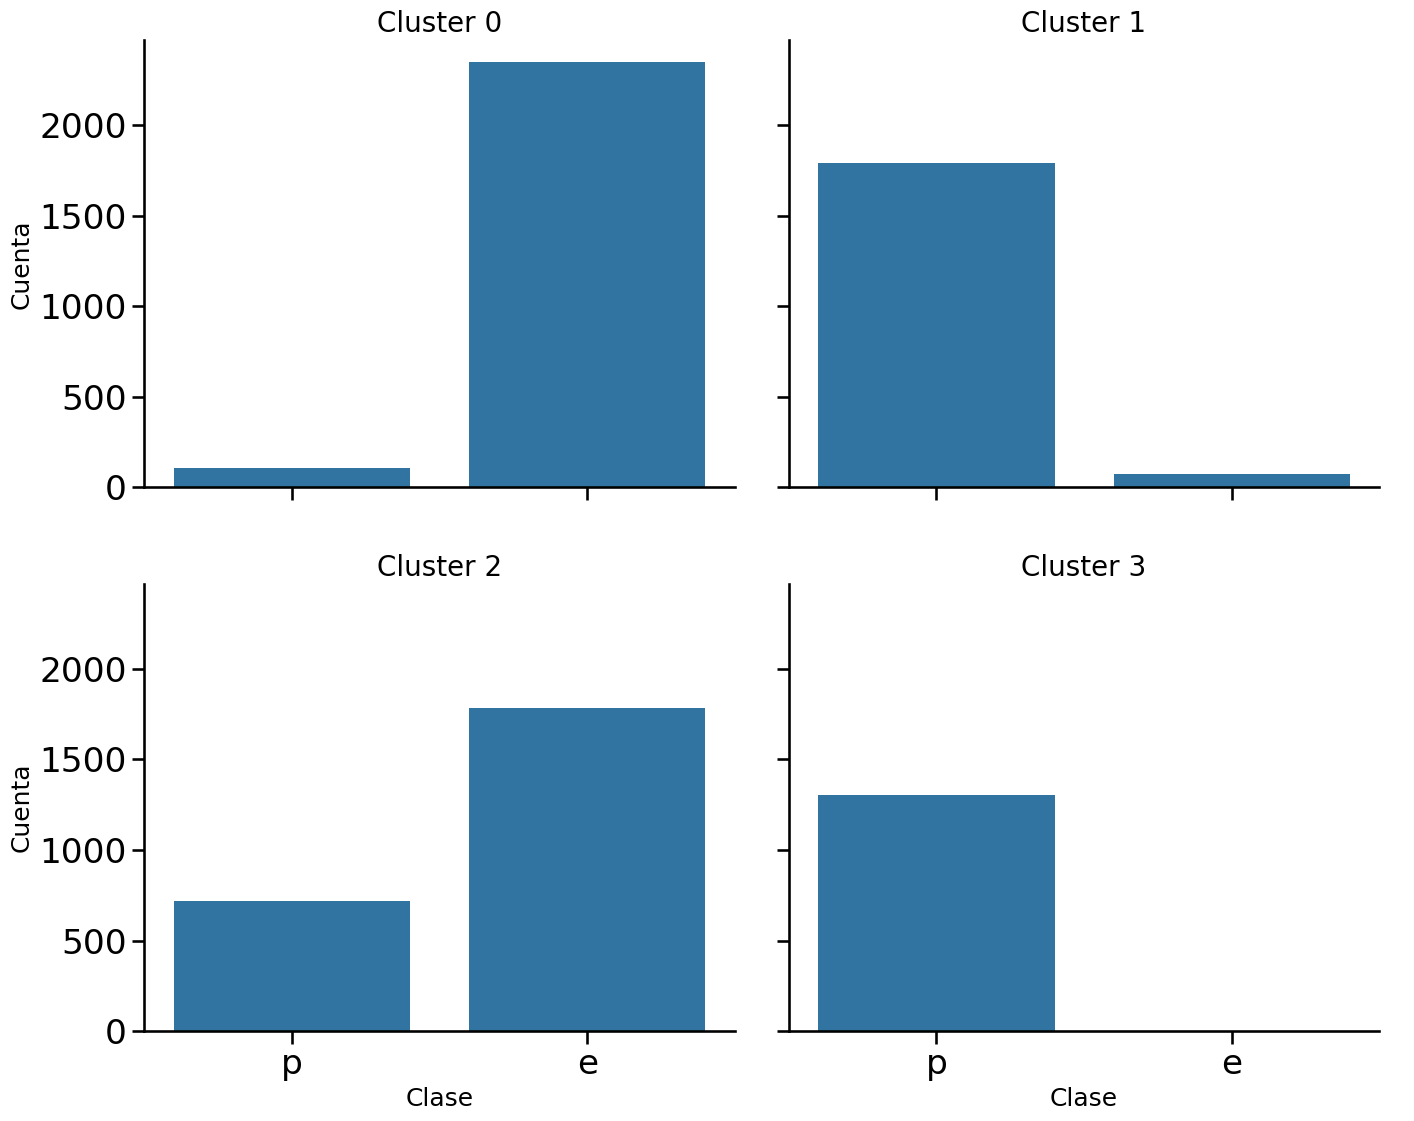

In [43]:
import seaborn as sns

# Cambia el número de clusters a 4 si quieres seguir el método del codo
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_encoded)
df_cleaned['cluster'] = kmeans.labels_

# Ajusta el contexto para aumentar la fuente
sns.set_context("talk", font_scale=1.5)

# Dibuja el catplot con mayor tamaño de figura
ax = sns.catplot(
    col='cluster', x='class', data=df_cleaned, kind='count', col_wrap=2,
    height=6, aspect=1.2
)

# Opcional: Ajusta los títulos de cada subgráfica
ax.set_titles("Cluster {col_name}", size=20)
ax.set_xlabels("Clase", size=18)
ax.set_ylabels("Cuenta", size=18)

Vamos a ver qué tal queda esto pintado. Para ello, repetimos el scatterplot de antes pero usando como color el cluster asignado por kmeans.

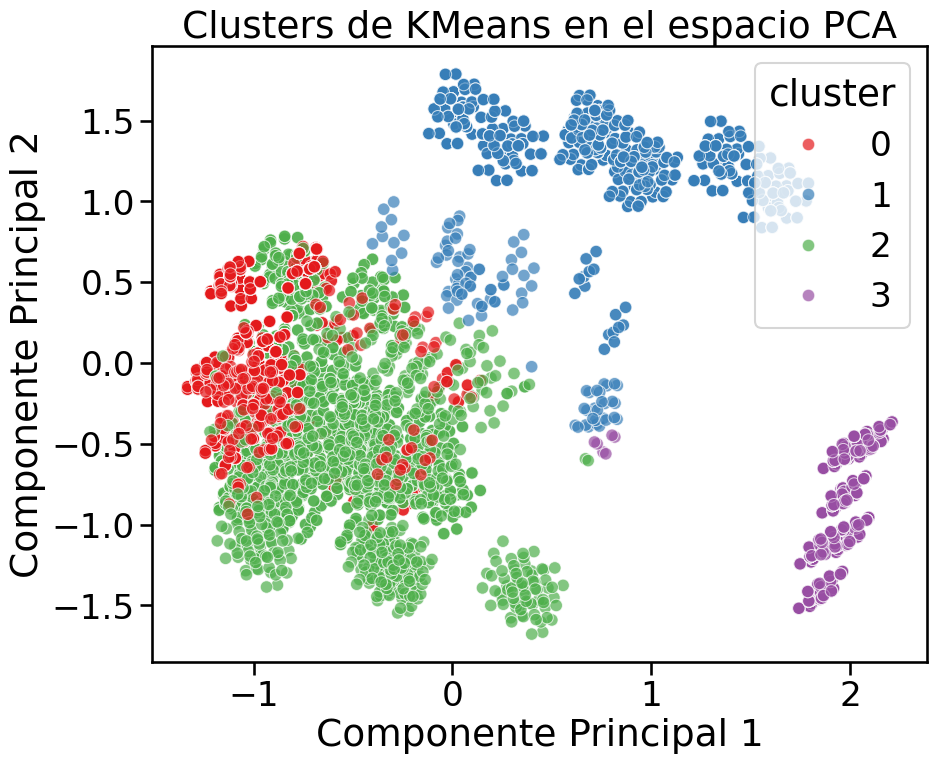

DataFrame guardado en data/processed/mushrooms_cleaned_4.csv


In [44]:
# Entrenar PCA para representar.
pca = PCA(n_components=2)
pca.fit(X_encoded)
# Transformar los datos
X_pca = pca.transform(X_encoded)
# Crear un DataFrame con las componentes principales y los clusters
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['cluster'] = df_cleaned['cluster']

# Usar un color por cada cluster
def visualizar_clusters(df, cluster_col='cluster'):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=df, x='PC1', y='PC2', hue=cluster_col, palette='Set1', alpha=0.7)
    plt.title('Clusters de KMeans en el espacio PCA')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.legend(title=cluster_col)
    plt.show()
visualizar_clusters(df_pca, cluster_col='cluster')
# Guardar el DataFrame limpio y con clusters
import os

def guardar_dataframe(df, path):
    # Ensure the directory exists
    os.makedirs(os.path.dirname(path), exist_ok=True)
    df.to_csv(path, index=False)
    print(f"DataFrame guardado en {path}")
guardar_dataframe(df_cleaned, 'data/processed/mushrooms_cleaned_4.csv')


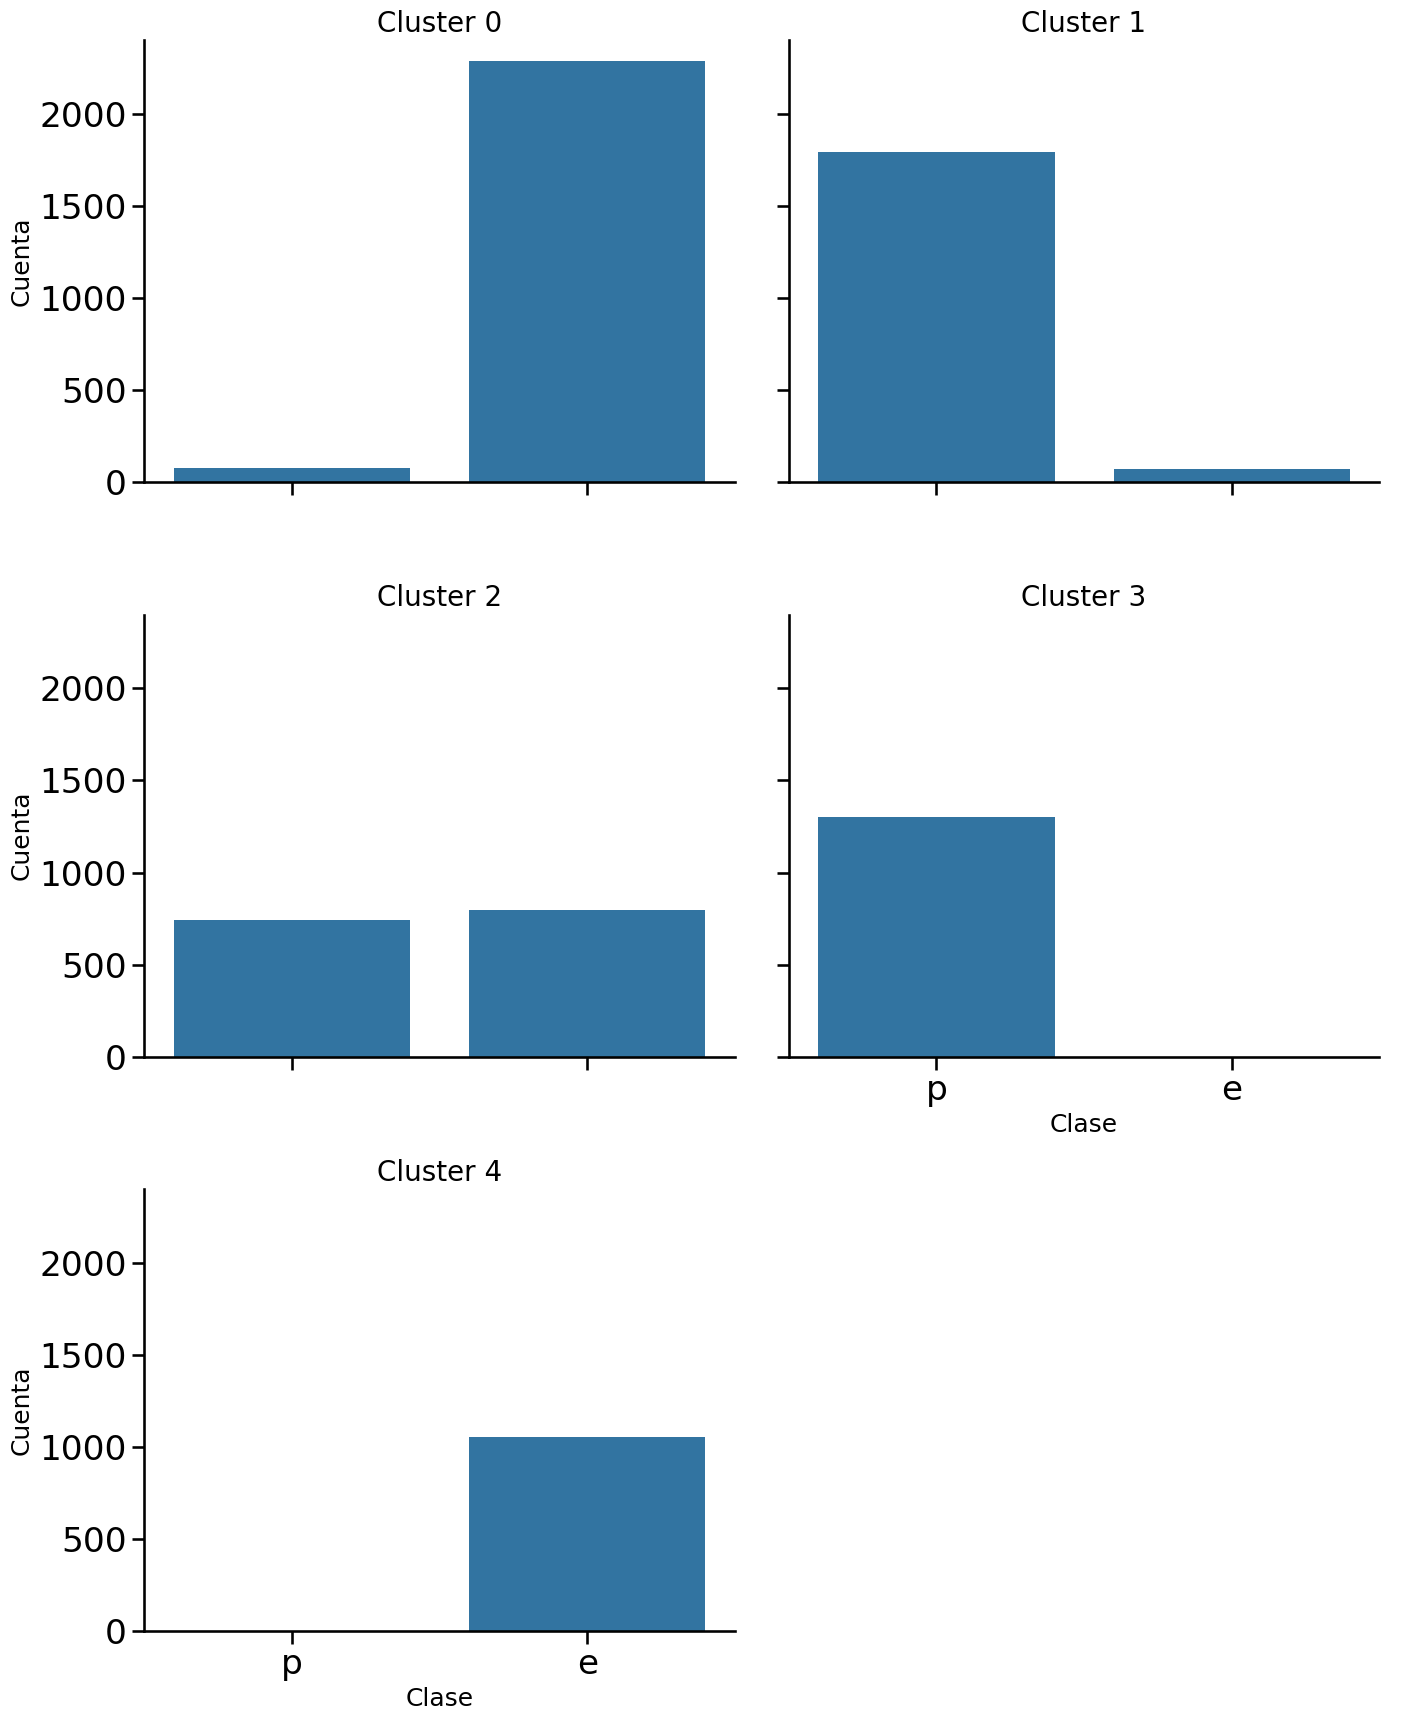

In [45]:
import seaborn as sns

# Cambia el número de clusters a 4 si quieres seguir el método del codo
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_encoded)
df_cleaned['cluster'] = kmeans.labels_

# Ajusta el contexto para aumentar la fuente
sns.set_context("talk", font_scale=1.5)

# Dibuja el catplot con mayor tamaño de figura
ax = sns.catplot(
    col='cluster', x='class', data=df_cleaned, kind='count', col_wrap=2,
    height=6, aspect=1.2
)

# Opcional: Ajusta los títulos de cada subgráfica
ax.set_titles("Cluster {col_name}", size=20)
ax.set_xlabels("Clase", size=18)
ax.set_ylabels("Cuenta", size=18)

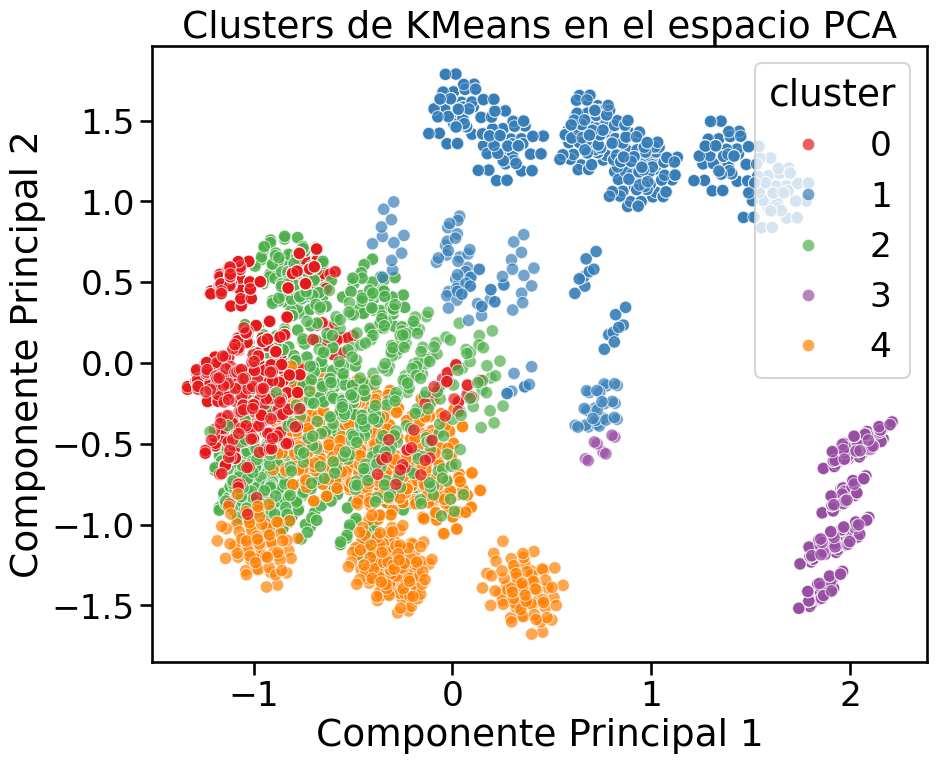

DataFrame guardado en data/processed/mushrooms_cleaned_5.csv


In [46]:
# Entrenar PCA para representar.
pca = PCA(n_components=2)
pca.fit(X_encoded)
# Transformar los datos
X_pca = pca.transform(X_encoded)
# Crear un DataFrame con las componentes principales y los clusters
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['cluster'] = df_cleaned['cluster']

# Usar un color por cada cluster
def visualizar_clusters(df, cluster_col='cluster'):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=df, x='PC1', y='PC2', hue=cluster_col, palette='Set1', alpha=0.7)
    plt.title('Clusters de KMeans en el espacio PCA')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.legend(title=cluster_col)
    plt.show()
visualizar_clusters(df_pca, cluster_col='cluster')
# Guardar el DataFrame limpio y con clusters
import os

def guardar_dataframe(df, path):
    # Ensure the directory exists
    os.makedirs(os.path.dirname(path), exist_ok=True)
    df.to_csv(path, index=False)
    print(f"DataFrame guardado en {path}")
guardar_dataframe(df_cleaned, 'data/processed/mushrooms_cleaned_5.csv')


#### **********************************************************
### Análisis comparativo: 4 clusters vs 5 clusters (KMeans sobre PCA)

#### **Con 5 clusters**
- Se observa un cluster (el morado, cluster 4) que queda muy aislado a la derecha, agrupando puntos que ya estaban juntos en el espacio PCA.
- El resto de clusters (rojo, verde, azul, naranja) se reparten el resto de los datos, pero hay cierta fragmentación: algunos clusters parecen dividir regiones que ya estaban bastante compactas.
- Hay cierta redundancia: dos clusters (por ejemplo, naranja y verde) ocupan zonas muy próximas, lo que sugiere que el algoritmo está "forzando" la separación para cumplir con 5 grupos.

#### **Con 4 clusters**
- Los clusters se ajustan mejor a la estructura natural de los datos en el espacio PCA.
- No hay clusters "forzados" ni fragmentación artificial: cada grupo ocupa una región bien definida y compacta.
- El cluster morado (aislado en la derecha) sigue existiendo, pero ahora los otros tres clusters ocupan regiones más amplias y coherentes.
- La separación entre clusters es más clara y natural.

---

### **¿Cuál es mejor?**

- **El clustering con 4 clusters es mejor.**
    - Se ajusta al "codo" del gráfico de inercia.
    - Los grupos son más compactos y naturales, sin fragmentaciones artificiales.
    - No hay clusters redundantes ni regiones forzadas.
    - La interpretación es más sencilla y los clusters reflejan mejor la estructura real de los datos.

**Resumen:**  
El clustering con 4 clusters es más coherente y fiel a la estructura de los datos. El de 5 clusters añade un grupo innecesario y fragmenta regiones que ya estaban bien agrupadas. Por tanto, **usa 4 clusters** para tu análisis.
#### **********************************************************
#### **********************************************************

¿Es bastante parecido no? No es tan bueno como el Random Forest, pero ha conseguido identificar bastante bien los distintos puntos del dataset sin utilizar las etiquetas. De hecho, el diagrama de factor que hemos visto antes muestra que solo un par de clusters son imprecisos. Si no hubieramos tenido etiquetas esta aproximacion nos hubiera ayudado mucho a clasificar los distintos tipos de hongos.

#### **********************************************************
La clase `KMeans` de scikit-learn es uno de los algoritmos de clustering más populares y fundamentales. Vamos a desmenuzarla a fondo, utilizando el enlace que proporcionaste como nuestra guía principal.

Como experto en Ciencia de Datos, te guiaré a través de sus conceptos, cómo funciona, sus parámetros clave, atributos y los métodos que te permitirán interactuar con él.

---

## La Clase `sklearn.cluster.KMeans`: Un Análisis Exhaustivo

`KMeans` es un algoritmo de **clustering basado en centroides**. Su objetivo principal es dividir un conjunto de datos en $K$ grupos (clusters) distintos, donde cada punto de datos pertenece al grupo cuyo centroide (el punto central del cluster) es el más cercano. Imagina que quieres organizar una sala llena de gente en pequeños grupos basados en su ubicación geográfica; KMeans haría precisamente eso, encontrando los "centros" de esos grupos.

### Fundamentos del Algoritmo KMeans

El algoritmo iterativo de KMeans funciona de la siguiente manera:

1.  **Inicialización:** Se eligen $K$ centroides iniciales de forma aleatoria o semi-aleatoria (veremos esto en el parámetro `init`). Estos centroides representan los "centros" provisionales de tus grupos.
2.  **Asignación (Expectation):** Cada punto de datos en tu conjunto se asigna al centroide más cercano. La distancia más común es la distancia euclidiana (la "distancia en línea recta").
3.  **Actualización (Maximization):** Una vez que todos los puntos están asignados, se recalcula la posición de cada centroide. El nuevo centroide de un cluster se convierte en el promedio (media) de todos los puntos que le fueron asignados.
4.  **Convergencia:** Los pasos 2 y 3 se repiten hasta que los centroides ya no cambian significativamente de posición, o se alcanza un número máximo de iteraciones. Esto significa que los clusters se han estabilizado.

### Parámetros Clave (`Parameters` en la documentación)

Estos son los argumentos que le pasas al constructor `KMeans()` para configurarlo. Comprenderlos es crucial para obtener buenos resultados.

1.  **`n_clusters` (int, default=8)**
    * **¿Qué es?** El número de clusters (grupos) que el algoritmo intentará formar. Es el `K` en KMeans.
    * **Importancia:** ¡Este es el parámetro más importante! Debes decidir de antemano cuántos grupos esperas encontrar en tus datos. Si no tienes una idea, a menudo se utilizan métodos como el "método del codo" o el "coeficiente de la silueta" para estimar un buen `n_clusters`.
    * **Ejemplo:** `KMeans(n_clusters=3)` significa que quieres dividir tus datos en 3 grupos.

2.  **`init` (str o array-like, default='k-means++')**
    * **¿Qué es?** El método de inicialización de los centroides. Una buena inicialización es vital para que el algoritmo converja rápidamente y evite mínimos locales (soluciones subóptimas).
    * **Opciones principales:**
        * **`'k-means++'` (Recomendado):** Este es el valor por defecto y es un algoritmo inteligente para elegir los centroides iniciales. Intenta elegir puntos que estén lejos unos de otros, lo que acelera la convergencia y produce mejores resultados.
        * **`'random'`:** Elige `n_clusters` puntos aleatorios del conjunto de datos como centroides iniciales. Es más susceptible a obtener malos resultados si los puntos iniciales no son representativos.
        * **`array-like`:** Puedes pasar un array NumPy con las coordenadas de los `n_clusters` centroides que quieres usar para empezar. Esto es útil si tienes conocimiento previo o quieres reproducir un inicio específico.

3.  **`n_init` (int, default=10 for versions < 1.2, 'auto' for >= 1.2)**
    * **¿Qué es?** El número de veces que el algoritmo KMeans se ejecutará con diferentes inicializaciones de centroides.
    * **Importancia:** Dado que KMeans es sensible a la elección inicial de los centroides, ejecutarlo múltiples veces con diferentes inicios y elegir el mejor resultado (el que tiene la menor inercia, ver `inertia_` más adelante) ayuda a mitigar el problema de los mínimos locales.
    * **'auto' (recomendado para versiones >= 1.2):** Combina el comportamiento de `n_init` con `n_iter_no_change`. En versiones antiguas, era 10. Siempre se recomienda usar un valor mayor a 1 para asegurar la robustez.

4.  **`max_iter` (int, default=300)**
    * **¿Qué es?** El número máximo de iteraciones que el algoritmo ejecutará para cada una de las `n_init` corridas.
    * **Importancia:** Es un mecanismo de seguridad para evitar que el algoritmo se ejecute indefinidamente si no converge. 300 es generalmente un buen valor por defecto.

5.  **`tol` (float, default=1e-4)**
    * **¿Qué es?** La tolerancia con respecto al cambio en la inercia (suma de cuadrados de las distancias) para considerar que el algoritmo ha convergido.
    * **Importancia:** Si el cambio en la inercia entre dos iteraciones consecutivas es menor que `tol`, el algoritmo detiene esa corrida particular, asumiendo que ha encontrado una solución estable.

6.  **`verbose` (int, default=0)**
    * **¿Qué es?** Controla la verbosidad de la salida.
    * **Importancia:** Si lo estableces a un valor mayor que 0, `KMeans` imprimirá mensajes de progreso durante el entrenamiento. Útil para depuración o si estás trabajando con datasets muy grandes y quieres ver cómo avanza.

7.  **`random_state` (int, RandomState instance, or None, default=None)**
    * **¿Qué es?** La semilla para la generación de números aleatorios.
    * **Importancia:** Si quieres que tus resultados sean **reproducibles**, debes fijar `random_state`. Sin él, cada vez que ejecutes el código, los centroides iniciales serán diferentes (si `init='random'` o `n_init > 1`), y podrías obtener clusters ligeramente distintos.

8.  **`algorithm` (str, default='lloyd')**
    * **¿Qué es?** El algoritmo KMeans a utilizar. En versiones más recientes de scikit-learn, el valor por defecto es `'lloyd'`, que es el algoritmo estándar.
    * **Opciones antiguas/alternativas (menos comunes en nuevas versiones):** `'elkan'` (más eficiente para datos densos si los centroides están bien separados), `'full'` (similar a lloyd), `'auto'`.
    * **Recomendación:** Generalmente, `'lloyd'` (el predeterminado) es suficiente. `'elkan'` puede ser más rápido en algunos casos.

### Atributos Clave (`Attributes` en la documentación)

Estos son los resultados que el objeto `KMeans` te proporciona *después* de que ha sido `fit()` (entrenado).

1.  **`cluster_centers_` (ndarray de forma (n_clusters, n_features))**
    * **¿Qué es?** Las coordenadas de los centroides finales de cada cluster. Cada fila representa un centroide, y las columnas son las características.
    * **Ejemplo:** `model.cluster_centers_[0]` te daría las coordenadas del centroide del primer cluster.

2.  **`labels_` (ndarray de forma (n_samples,))**
    * **¿Qué es?** Las etiquetas de cluster asignadas a cada punto de datos del conjunto de entrenamiento. Cada elemento en este array corresponde a la fila del dataset de entrenamiento y contiene el índice del cluster al que pertenece (ej. 0, 1, 2, ... hasta `n_clusters-1`).
    * **Ejemplo:** `model.labels_[5]` te diría a qué cluster pertenece el sexto punto de tus datos.

3.  **`inertia_` (float)**
    * **¿Qué es?** La suma de los cuadrados de las distancias de cada punto a su centroide asignado. Es una medida de cuán "compactos" son los clusters.
    * **Importancia:** Un valor de inercia más bajo generalmente indica clusters más densos y mejor formados. Es el criterio que `KMeans` utiliza internamente para elegir la mejor de las `n_init` corridas. Se utiliza a menudo en el "método del codo" para determinar `n_clusters`.

4.  **`n_iter_` (int)**
    * **¿Qué es?** El número de iteraciones reales que se ejecutó el algoritmo para converger en la mejor de las `n_init` corridas.

### Métodos Clave (`Methods` en la documentación)

Estos son las funciones que puedes llamar sobre tu objeto `KMeans` una vez que lo has instanciado.

1.  **`fit(X[, y, sample_weight])`**
    * **¿Qué hace?** Entrena el modelo KMeans utilizando los datos `X`. Este es el paso donde el algoritmo encuentra los centroides y asigna los puntos a los clusters.
    * **`X`**: El conjunto de datos de entrada (generalmente un array NumPy o DataFrame de Pandas), donde cada fila es una muestra y cada columna es una característica.
    * **`y`**: En clustering no supervisado, `y` se ignora (es `None`).
    * **`sample_weight`**: Pesos opcionales para las muestras, para dar más importancia a ciertos puntos durante el entrenamiento.

2.  **`fit_predict(X[, y, sample_weight])`**
    * **¿Qué hace?** Realiza `fit(X)` y luego `predict(X)` en una sola llamada.
    * **Retorna:** Las etiquetas de cluster para cada punto en `X`.
    * **Utilidad:** Conveniente si solo necesitas las etiquetas de los clusters de los datos que estás entrenando.

3.  **`predict(X)`**
    * **¿Qué hace?** Asigna cada punto en un nuevo conjunto de datos `X` al cluster más cercano basado en los centroides aprendidos durante `fit()`.
    * **`X`**: El nuevo conjunto de datos para predecir.
    * **Retorna:** Las etiquetas de cluster para cada punto en `X`.
    * **Utilidad:** Para clasificar nuevos puntos de datos una vez que tu modelo está entrenado.

4.  **`transform(X)`**
    * **¿Qué hace?** Calcula la distancia de cada punto en `X` a cada uno de los centroides de cluster.
    * **Retorna:** Un array donde cada fila corresponde a un punto de `X`, y cada columna es la distancia de ese punto al centroide del cluster `k`.
    * **Utilidad:** Para entender qué tan lejos está un punto de cada cluster, no solo a qué cluster pertenece. A menudo se usa en técnicas de reducción de dimensionalidad o como características para otros modelos.

5.  **`score(X[, y, sample_weight])`**
    * **¿Qué hace?** Calcula la inercia del conjunto de datos `X` con respecto a los centroides actuales.
    * **Retorna:** La inercia (negativa por convención de scikit-learn para que "mayor" sea "mejor", aunque en inercia menor es mejor).
    * **Utilidad:** Es similar a `inertia_`, pero puedes usarlo para calcular la inercia de un conjunto de datos diferente al de entrenamiento.

### Limitaciones de KMeans

Aunque es poderoso y fácil de usar, KMeans tiene algunas limitaciones:

* **Necesita `n_clusters` de antemano:** Si no sabes cuántos grupos existen, es un desafío.
* **Sensible a la inicialización:** Aunque `k-means++` y `n_init` lo mitigan, una mala inicialización puede llevar a mínimos locales.
* **Asume clusters esféricos y de tamaño similar:** No funciona bien con clusters de formas irregulares, densidad variable o cuando hay solapamiento.
* **Sensible a *outliers*:** Los valores atípicos pueden arrastrar los centroides.
* **Solo funciona con datos numéricos:** Las características deben ser numéricas. Para datos categóricos, necesitas codificarlos (por ejemplo, con One-Hot Encoding).

### ¿Cuándo usar KMeans?

* Cuando tienes una idea clara de cuántos clusters esperas.
* Cuando los clusters son aproximadamente esféricos y de densidad similar.
* Para datasets grandes, ya que es relativamente eficiente computacionalmente.
* Como paso inicial de exploración de datos.

---

Espero que esta explicación exhaustiva te dé una comprensión profunda de la clase `KMeans` en scikit-learn. Es una herramienta fundamental en el arsenal de cualquier científico de datos, y dominarla te abrirá muchas puertas en el análisis de clustering. ¡Ahora ya puedes empezar a agrupar esos datos!

## **K-MEANS**
### Un Ejemplo de Uso Básico

Etiquetas de los 5 primeros puntos: [0 2 1 2 0]
Centroides de los clusters:
[[ 1.98258281  0.86771314]
 [ 0.94973532  4.41906906]
 [-1.37324398  7.75368871]
 [-1.58438467  2.83081263]]
Inercia del modelo (suma de distancias cuadradas): 212.01
Número de iteraciones para la mejor corrida: 3


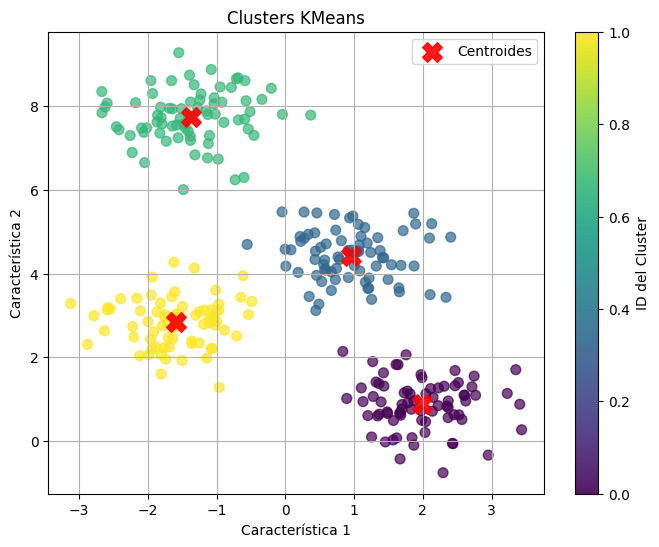


El nuevo punto [0 0] pertenece al cluster: 0
Distancias del nuevo punto a cada centroide: [2.16415358 4.5199744  7.87435633 3.24403683]


In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs # Para generar datos de ejemplo
import matplotlib.pyplot as plt
import numpy as np

# 1. Generar datos de ejemplo
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# 2. Instanciar el modelo KMeans
# Queremos 4 clusters, usaremos k-means++ para la inicialización
# y ejecutaremos el algoritmo 10 veces para elegir el mejor resultado.
# Fijamos random_state para reproducibilidad.
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=42)

# 3. Entrenar el modelo
kmeans.fit(X)

# 4. Acceder a los atributos y hacer predicciones
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_
model_inertia = kmeans.inertia_
num_iterations = kmeans.n_iter_

print(f"Etiquetas de los 5 primeros puntos: {cluster_labels[:5]}")
print(f"Centroides de los clusters:\n{cluster_centers}")
print(f"Inercia del modelo (suma de distancias cuadradas): {model_inertia:.2f}")
print(f"Número de iteraciones para la mejor corrida: {num_iterations}")

# 5. Visualizar los clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, s=50, cmap='viridis', alpha=0.7)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, alpha=0.9, marker='X', label='Centroides')
plt.title('Clusters KMeans')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.colorbar(label='ID del Cluster')
plt.legend()
plt.grid(True)
plt.show()

# 6. Predecir para nuevos datos (ej. un punto al azar)
new_point = np.array([[0, 0]])
predicted_cluster = kmeans.predict(new_point)
print(f"\nEl nuevo punto {new_point[0]} pertenece al cluster: {predicted_cluster[0]}")

# 7. Transformar (distancia a los centroides)
distances_to_centers = kmeans.transform(new_point)
print(f"Distancias del nuevo punto a cada centroide: {distances_to_centers[0]}")

#### **********************************************************
#### **********************************************************